In [1]:
import pandas as pd
import numpy as np

from dataProcessing import processing

path = f'../Data'
dfs = processing(path)

In [2]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

rfr = RandomForestRegressor(n_estimators=300, max_depth=15, random_state= 37)

In [3]:
scaler = StandardScaler()

for year in range(2021, 2024):

    dfs[f'Data\\{year}']['PtsNextGame'] = (dfs[f'Data\\{year}'])['PTS'].shift(-1) 

    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis = 1)
    y = dfs[f'Data\\{year}']['PtsNextGame']

    X = X.iloc[:-1]
    y = y.iloc[:-1]

    X = scaler.fit_transform(X)

    y = y.to_numpy()

    X = X.reshape((X.shape[0], X.shape[1]))
    y = y.reshape(y.shape[0],1)

    rfr.fit(X, y)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [4]:
dfs[f'Data\\2024']['PtsNextGame'] = (dfs[f'Data\\2024'])['PTS'].shift(-1) # Shifting by 1.

X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = (X_test.iloc[:-1]) # Removing NaN value formed by shift.
X_test = scaler.fit_transform(X_test)

y_test = dfs['Data\\2024']['PtsNextGame']
y_test = (y_test.iloc[:-1]).to_numpy() # Removing NaN value formed by shift.

predictions = rfr.predict(X_test)

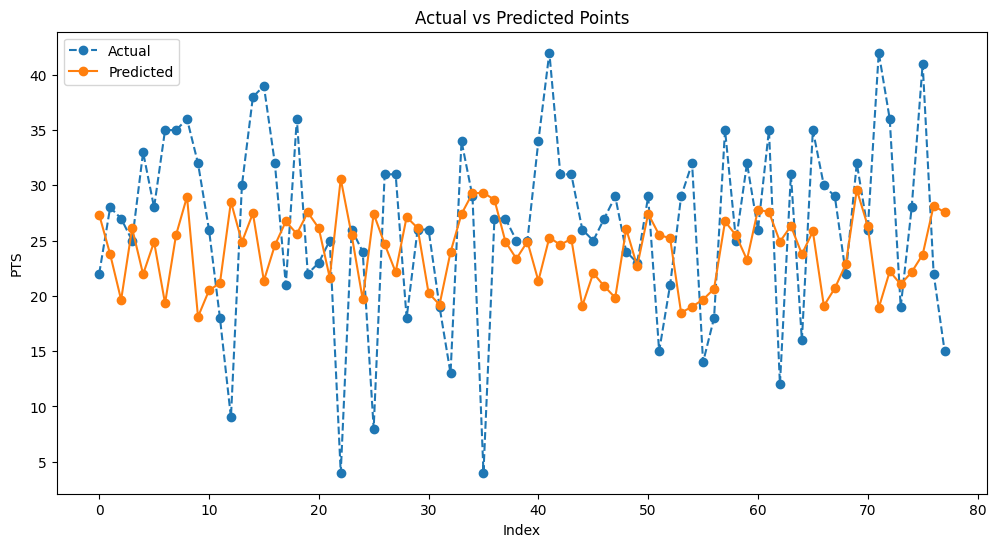

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions, label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: >

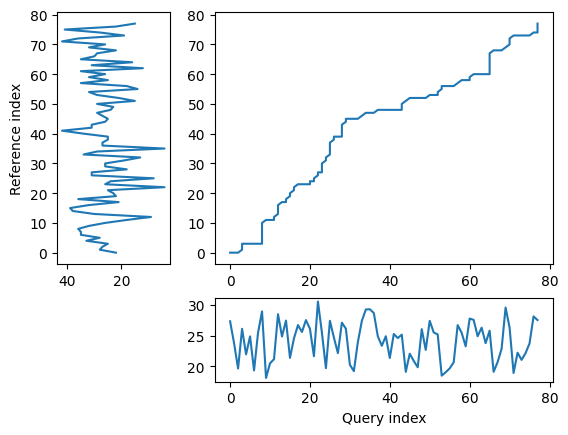

In [6]:
from dtw import *

query = predictions
template = y_test

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type = 'threeway')

In [7]:
from sklearn.metrics import root_mean_squared_log_error, mean_gamma_deviance
print(f"\nRMSLE : {root_mean_squared_log_error(predictions, y_test)}\n\n MGD : {mean_gamma_deviance(predictions, y_test)}\n")


RMSLE : 0.4578720925636734

 MGD : 0.38306912775937446

